### IDs:
Insert yours IDs to the cell below

ID #1: 316223650

ID #2: 301315040


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

#### Loading the dataset

In [2]:

from sklearn.datasets import load_boston
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    X, y = load_boston(return_X_y=True)

columns = [
    'CRIM', #     per capita crime rate by town
    'ZN', #       proportion of residential land zoned for lots over 25,000 sq.ft.
    'INDUS', #    proportion of non-retail business acres per town
    'CHAS', #     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    'NOX', #      nitric oxides concentration (parts per 10 million)
    'RM', #       average number of rooms per dwelling
    'AGE', #      proportion of owner-occupied units built prior to 1940
    'DIS', #      weighted distances to five Boston employment centres
    'RAD', #      index of accessibility to radial highways
    'TAX', #      full-value property-tax rate per $10,000
    'PTRATIO', #  pupil-teacher ratio by town
    'B', #        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    'LSTAT', #     % lower status of the population
]

df_boston = pd.DataFrame(data=X, columns=columns)

In [3]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#### 1.1

In [4]:
print(f"The dataset has {X.shape[0]} samples, {X.shape[1]} features, each vaiable has '{X.dtype}' data type")

The dataset has 506 samples, 13 features, each vaiable has 'float64' data type


#### 1.2

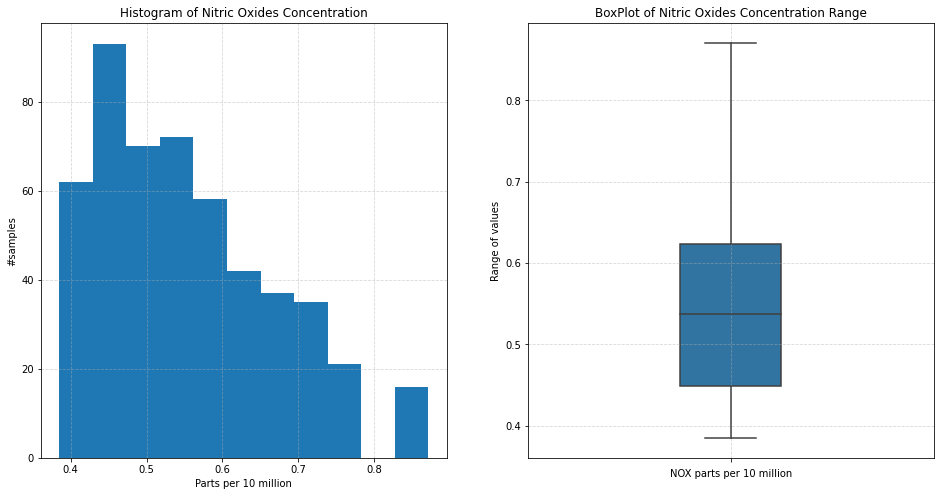

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Histogram
axes[0].hist(df_boston['NOX'], bins=11);
axes[0].set_title("Histogram of Nitric Oxides Concentration");
axes[0].set_xlabel('Parts per 10 million');
axes[0].set_ylabel('#samples');
axes[0].grid(alpha=0.5, linestyle='dashed');

# Boxplot
sns.boxplot(y="NOX", data=df_boston, ax=axes[1], width=0.25);
axes[1].set_title("BoxPlot of Nitric Oxides Concentration Range");
axes[1].set_ylabel('Range of values');
axes[1].set_xlabel('NOX parts per 10 million');
axes[1].grid(alpha=0.5, linestyle='dashed');

#### 1.3

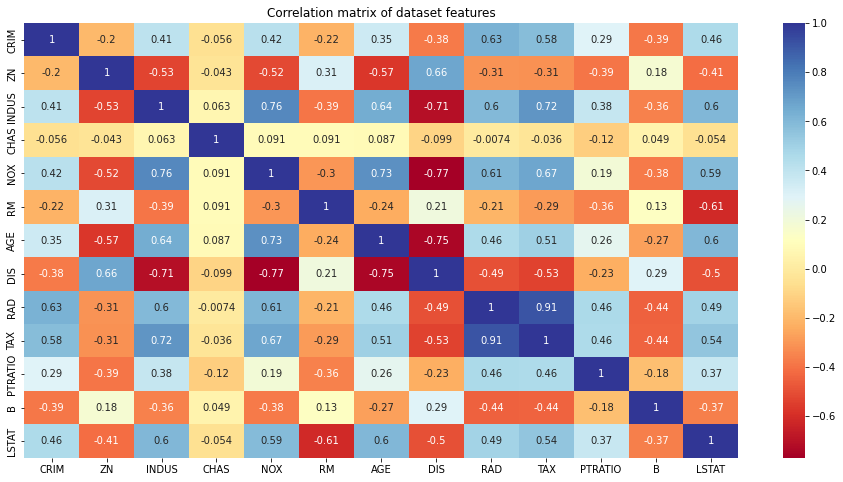

In [6]:
fig, axes = plt.subplots(figsize=(16,8))
sns.heatmap(df_boston.corr(), cmap='RdYlBu', annot=True, ax=axes);
axes.set_title("Correlation matrix of dataset features");

We consider two features as (strongly) correlated if their correlation value is higher than 0.8. `TAX` and `RAD` has correlation index of **0.91**. Meaning that when the index of accessibility to radial highways is smaller, the tax payment raises. The negative (storng) correlation, value < -0.8, isn't demonstrated here. However, there are two features that aimes to this threshold: `DIS` and `NOX`. Meaning that when you get closer to the Boston's employment centers, the nitric oxides concentration raises (a fact that makes sense overall).  
The unusual behavior comes from the `CHAS` feature, that has no correlation at all to all other features (its corr values aimes to 0).

#### 1.4

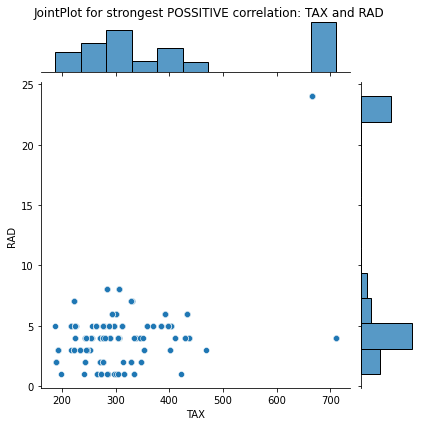

In [7]:
plot = sns.jointplot(x="TAX", y="RAD", data=df_boston, marginal_kws=dict(bins=11));
plot.fig.suptitle("JointPlot for strongest POSSITIVE correlation: TAX and RAD");
plot.fig.subplots_adjust(top=0.95)

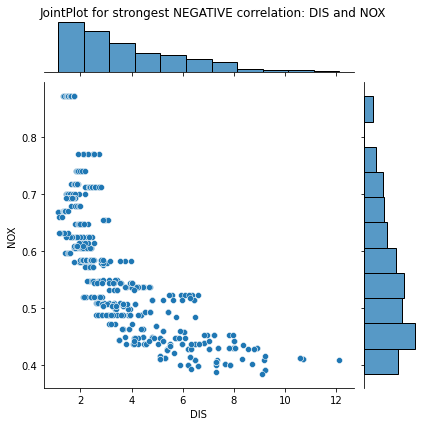

In [8]:
plot = sns.jointplot(x="DIS", y="NOX", data=df_boston, marginal_kws=dict(bins=11));
plot.fig.suptitle("JointPlot for strongest NEGATIVE correlation: DIS and NOX");
plot.fig.subplots_adjust(top=0.95)

#### 1.5

Text(0, 0.5, '#properties built until this age')

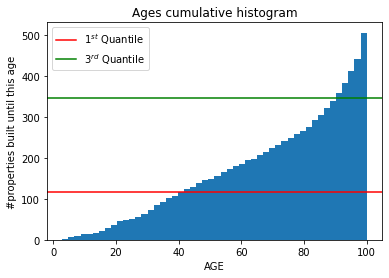

In [9]:
axes = df_boston['AGE'].hist(cumulative=True, bins=50, grid=False);
axes.set_title("Ages cumulative histogram");
cum = df_boston['AGE'].cumsum() / df_boston['AGE'].sum()
q1,q3 = cum.quantile([0.25,0.75])
axes.axhline(q1*len(cum), c='r');
axes.axhline(q3*len(cum), c='g');
axes.legend(['$1^{st}$ Quantile','$3^{rd}$ Quantile']);
axes.set_xlabel('AGE')
axes.set_ylabel('#properties built until this age')

#### 1.6

1. The high correlation between `INDUS`(proportion of non-retail business acres per town) to `NOX`(nitric oxides concentration) **0.76**: we meet again the correlation between the industry to high NOX rates
2. The high negative correlation between `AGE`(proportion of owner-occupied units built prior to 1940) and `DIS`(weighted distances to five Boston employment centres) **-0.75**: we see that as we get closer to the employment centers, the properties age are older. This is a very common behavior we see over the world, where the cities build themself around their employment centers and new suburban neighborhoods are grawn further and surrunding the exisiting neighborhoods.

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

It takes $$n*m*k$$ numbers to write down a probability distribution on all possible values of these variables.
They are redundant, because they must sum to 1. 
Therefore the number of (functionally independent) parameters is 
$$(n*m*k)-1 \\
 (=(n*m*2)-1)$$

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

Because independent: $$P(X=z,Y=y,Z=z) = P(X=x)\cdot P(Y=y)\cdot P(Z=z)$$  
paramters for P(X=x) is n-1 (the sum of the probability must be 1 )

paramters for P(Y=y) is m-1 (the sum of the probability must be 1 )

paramters for P(Z=z) is k-1 (the sum of the probability must be 1 )

so the parameters define the joint distribution of 𝑋,𝑌 and 𝑍 is 
$$(n-1)+(m-1)+(k-1) \\
(=n+m+k-3 =n+m-1)$$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

because 𝑋 and 𝑌 are conditionaly independent given 𝑍 
$$P(X=x^Y=y|Z=z)=P(X=x|Z=z)*P(Y=y|Z=z)$$
so 
$$P(X=z,Y=y,Z=z) = P(X=x|Z=z)*P(Y=y|Z=z)*P(Z=Z)$$

paramters for $P(X=x|Z=z)$: for each k have n-1 paramters options ( P(X=x) have n-1 parameters (explained in B ))  
paramters for $P(Y=y|Z=z)$: for each k have m-1 paramters options ( P(Y=y) have m-1 parameters (explained in B ))  
paramters for $P(Z=z)$: k-1  (explained in B)  

so the parameters define the joint distribution of 𝑋,𝑌 and 𝑍 are
$$k(n-1)*k(m-1)*(k-1) \\
(= 4*n*m)$$

#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

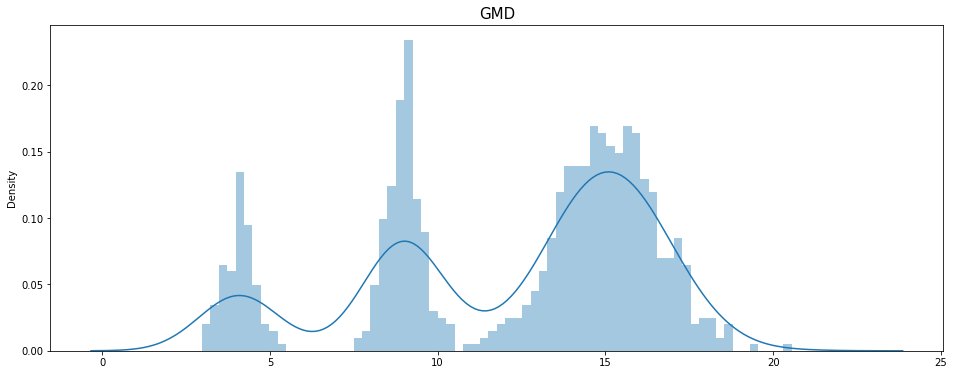

In [10]:
df_gmm = pd.read_csv('GMD_2021.csv', index_col=0, names=['GMM'])
fix,ax = plt.subplots(figsize=(16,6));
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    sns.distplot(df_gmm, ax=ax, bins=70);
ax.set_title('GMD', fontdict={"fontsize":15});

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

##### First estimation - equations solving (theory-based)

Let
$$ 
X_1 \sim N(\mu_1=4, \sigma_1=0.5) \\
X_2 \sim N(\mu_2=9, \sigma_2=0.5) \\
X_3 \sim N(\mu_3, \sigma_3=1.5)
$$
Define
$$
X = w_1X_1+w_2X_2+w_3X_3
$$
where
$$
w_2=0.25
$$

In [1]:
mu1, sigma1 = (4, 0.5)
mu2, sigma2 = (9, 0.5)
sigma3 = 1.5

w2 = 0.25

We're trying to evaluate the values of:
$$
\mu_3, w_1, w_3
$$

We observe from the data the following:

In [12]:
muX = df_gmm.GMM.mean()
sigmaX = df_gmm.GMM.std()
print(f"mu_X={muX}, sigma_X={sigmaX}")

mu_X=12.19884308211053, sigma_X=4.194165927760709


We saw in class that for GMM
$$
E(X) = \sum_{i=1}^{k}w_iE(X_i) \\
Var(X) = \sum_{i=1}^{k}w_iVar(X_i) + \sum_{i=1}^{k}w_i(\mu_i-\mu_X)^2
$$
Therefore
$$
\mu_X=E(X)=4w_1 + 9\cdot0.25 + w_3\mu_3 \\
(\sigma_X)^2 = Var(X) = w_10.5^2 + 0.25\cdot0.5^2 + w_31.5^2 + w_1(4-\mu_X)^2 + 0.25(9-\mu_X)^2 + w_3(\mu_3-\mu_X)^2
$$
By definition we get that
$$
\sum_{i=1}^{k}w_i = 1
$$

We can solve 3 equations with 3 variables
$$
\left\{ \begin{matrix}
9.949 = 4w_1 + w_3\mu_3 \\
14.970 = 67.471w_1 + 2.25w_3 + w_3(\mu_3-12.199)^2 \\
w_1+w_3 = 0.75 \\
\end{matrix} \right.
$$

Such that 
$$
\mu_3=15.089 \\
w_3=0.627 \\
w_1=0.123
$$

In [13]:
mu3 = 15.089
w1 = 0.123
w3 = 0.627


##### Second estimation - EM algorithm

In [14]:
def calc_resp(x, k, w, mu, sigma):
    return (w[k] * stats.norm.pdf(x, loc=mu[k], scale=sigma[k]))/sum(w*stats.norm.pdf(x, loc=mu, scale=sigma))

def calc_weights(resps):
    return resps.mean(axis=0)

def calc_mus(X, resps, new_w):
    return ((1/(new_w*len(X))) * (np.expand_dims(X, axis=1).T @ resps)).squeeze()

def calc_sigmas(X, resps, new_w, new_mu):
    return np.array([np.sqrt((1/(new_w[i]*len(X))) * ((np.expand_dims(X, axis=1).T -new_mu[i].repeat(len(X), axis=0))**2 @ resps[:, i]).squeeze()) for i in range(k)])

def convergence(w, new_w, mu, new_mu, sigma, new_sigma, val):
    return np.linalg.norm(w-new_w, 2) + np.linalg.norm(mu-new_mu, 2) + np.linalg.norm(sigma-new_sigma, 2) < val 



In [15]:
# Parameters initialization
w = np.zeros((3,))
w[0] = stats.uniform.rvs(size=1)
w[1] = w2
w[2] = 1 - w[0] - w[1]
mu = np.array([mu1, mu2, 0.])
sigma = np.array([sigma1, sigma2, sigma3])
k=3
X = df_gmm.GMM.to_numpy()

new_w = w.copy()
new_mu = mu.copy()
new_sigma = sigma.copy()

resps = np.zeros((X.shape[0], k))

# Starting iterative process
cold_start = True
while cold_start or not convergence(w, new_w, mu, new_mu, sigma, new_sigma, 1e-6):
    w = new_w.copy()
    mu = new_mu.copy()
    sigma = new_sigma.copy()

    for i, x in enumerate(X):
        for j in range(k):
            resps[i, j] = calc_resp(x, j, w, mu, sigma)
    
    new_w = calc_weights(resps)
    new_mu = calc_mus(X, resps, new_w)
    new_sigma = calc_sigmas(X, resps, new_w, new_mu)

    cold_start = False

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

In [16]:
def plot_MGG_pdf(mu, sigma, w, title="", N=20000, plot_hist=True):
    #generate 2 gaussians
    gaussian1 = stats.norm.rvs(loc=mu[0], scale=sigma[0], size=N)
    gaussian2 = stats.norm.rvs(loc=mu[1], scale=sigma[1], size=N)
    gaussian3 = stats.norm.rvs(loc=mu[2], scale=sigma[2], size=N)
    
    #create the gmm data
    gmm_data = []
    for i in range(N):
        p = stats.uniform.rvs(size=1) #generates random p's
        if p < w[0]:
            gmm_data.append(np.random.choice(a=gaussian1, size=1))
        elif p < w[0]+w[1]: 
            gmm_data.append(np.random.choice(a=gaussian2, size=1))
        else:
            gmm_data.append(np.random.choice(a=gaussian3, size=1))    
    gmm_data = np.array(gmm_data)

    if not plot_hist:
        return gmm_data

    #define limits - area of 3 stds
    s = 3
    max_val = mu[2] + s*sigma[2]
    min_val = mu[0] - s*sigma[0]

    #plot GMM
    label_gmm = 'f(x)={:.3f}*N({:.3f},{:.3f})+{:.3f}*N({:.3f},{:.3f})+{:.3f}*N({:.3f},{:.3f})'.format(w[0],mu[0],sigma[0]**2, w[1],mu[1],sigma[1]**2, w[2],mu[2],sigma[2]**2)
    fig = plt.figure(figsize=(16,6))
    sns.distplot(gmm_data[np.logical_and(min_val<=gmm_data, gmm_data<=max_val)], bins=70, label=label_gmm)
    plt.title(title)
    plt.legend();
    plt.show()

    return gmm_data

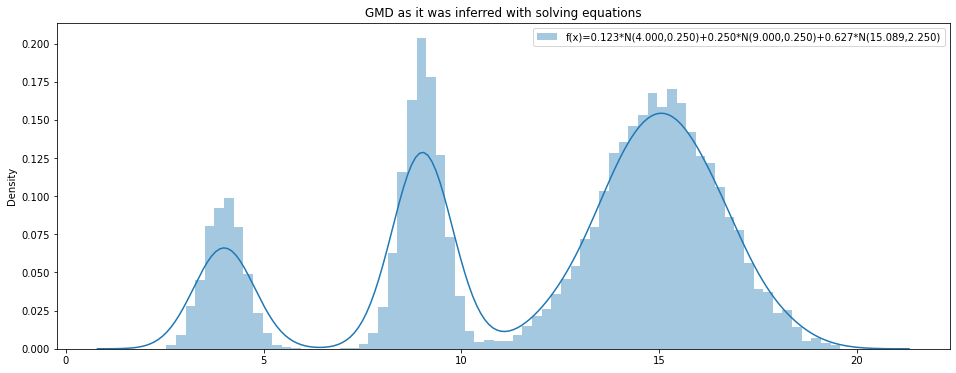

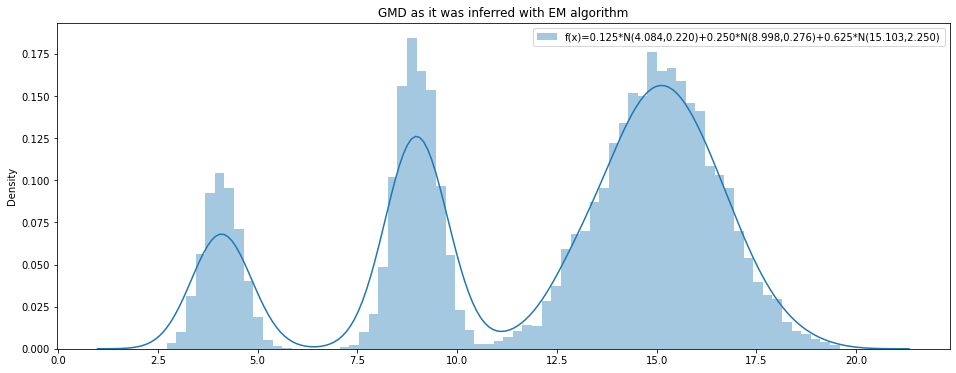

In [17]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    plot_MGG_pdf([mu1, mu2, mu3], [sigma1, sigma2, sigma3], [w1, w2, w3], 'GMD as it was inferred with solving equations');
    plot_MGG_pdf(new_mu, new_sigma, new_w, 'GMD as it was inferred with EM algorithm');

As seen in class most of the data demonstrated by area of 3 stds.  
Given $i_{min} = argmin_i\left\{\mu_i\right\}$ and $i_{max} = argmax_i\left\{\mu_i\right\}$ we can take samples that greater than $(\mu_{i_{min}} - 3\cdot \sigma_{i_{min}})$ and smaller than $(\mu_{i_{max}} + 3\cdot \sigma_{i_{max}})$

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

No, we can estimate those parameters only with the EM algorithm way (from the above mentioned ways). The second way we demonstrated above won't work here, since we solved 3 equations with 3 parameters. Now we still have 3 equations but more than 3 parameters to estimate. So the theory-based way won't work here.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

1. Since $w_1=w_2=w_3=0.33$ and $\sigma_1=\sigma_2=\sigma_3=1$ we can generate data for the standard normal density function $\varphi$, then duplicate the data 3 times and shift each batch of data by the corresponding $\mu_i$  
2. The way we generated the data in 3.B:  
2.1 Repeat n times  
2.2 Select a gaussian $i$ (with uniform distribution)  
2.3 Generate a data point for $N(\mu_i, 1)$  


#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


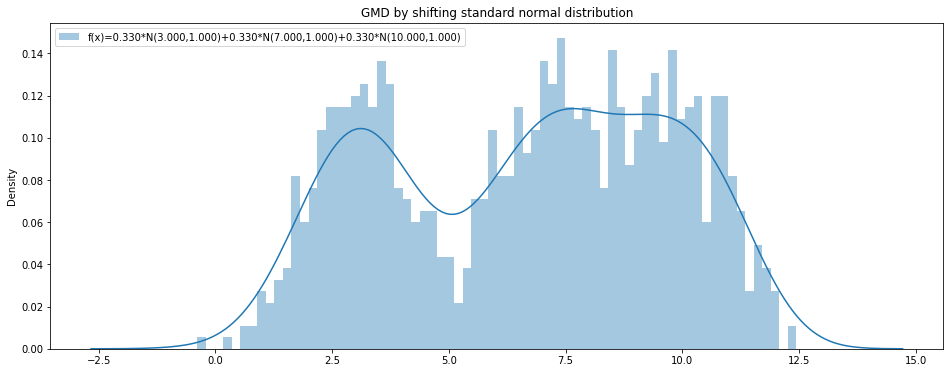

In [18]:
# implementation of method 1

N = 1000
#generate 2 gaussians
gaussian_E = stats.norm.rvs(size=N)
w_E = 0.33
sig_E = 1
mu_E = [3, 7, 10]

n_per_g_i = int(np.floor(N/3))
gaussian_E[:n_per_g_i] += mu_E[0]
gaussian_E[n_per_g_i+1:2*n_per_g_i] += mu_E[1]
gaussian_E[2*n_per_g_i+1:] += mu_E[2]

#plot GMM
label_gmm = 'f(x)={:.3f}*N({:.3f},{:.3f})+{:.3f}*N({:.3f},{:.3f})+{:.3f}*N({:.3f},{:.3f})'.format(w_E,mu_E[0],sig_E**2, w_E,mu_E[1],sig_E**2, w_E,mu_E[2],sig_E**2)
fig = plt.figure(figsize=(16,6))
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    sns.distplot(gaussian_E, bins=70, label=label_gmm)
plt.title("GMD by shifting standard normal distribution")
plt.legend();
plt.show()

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

In [19]:
gaussian_F = plot_MGG_pdf(mu_E, [1,1,1], [0.33,0.33,0.33], plot_hist=False, N=N)

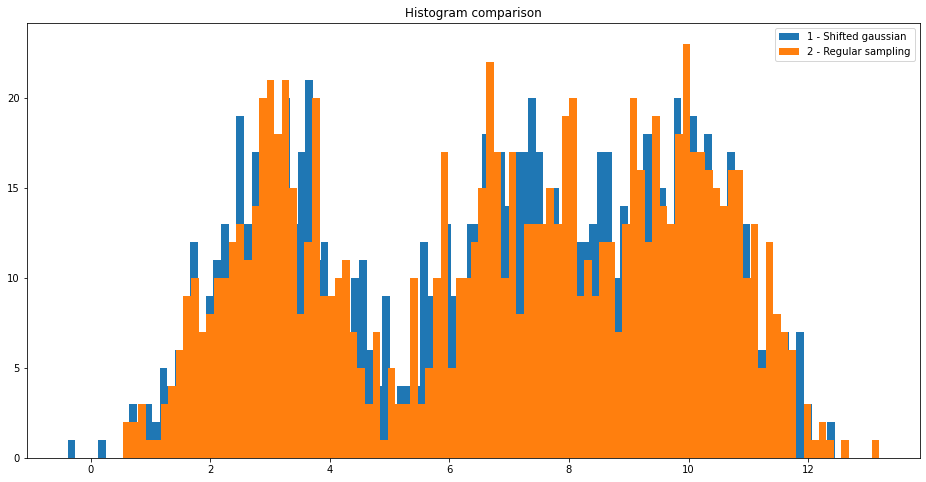

In [20]:
fig, axes = plt.subplots(figsize=(16,8))
axes.hist(gaussian_E, bins=100, label='1 - Shifted gaussian');
axes.hist(gaussian_F, bins=100, label='2 - Regular sampling');
axes.set_title("Histogram comparison")
axes.legend(loc='upper right')

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [21]:
mu = 70000
sigma = 30000

#### 4.A
What percent of people earn less than 50,000 RCU?

C:\Users\SharonK\.virtualenvs\DS38-Dev\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Probability Density')

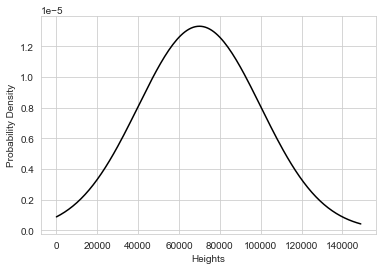

In [22]:
# import required libraries
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
# Creating the distribution
data = np.arange(0,150000,1000)
pdf = norm.pdf(data , loc = mu , scale = sigma )
 
#Visualizing the distribution
 
sb.set_style('whitegrid')
sb.lineplot(data, pdf , color = 'black')
plt.xlabel('Heights')
plt.ylabel('Probability Density')

In [23]:
normcdf = norm(loc = mu , scale = sigma).cdf(50000)
print('{:.2f}% of people earn less than 50000 RCU'.format(normcdf*100))

25.25% of people earn less than 50000 RCU


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [24]:
a = norm(loc = mu , scale = sigma).cdf(45000)
b = norm(loc = mu , scale = sigma).cdf(65000)

print('{:.2f}% of people earn between 45,000 RCU and 65,000 RCU'.format((b-a)*100))

23.15% of people earn between 45,000 RCU and 65,000 RCU


#### 4.C
What percent of people earn more than 70,000 RCU?

In [25]:
a = norm(loc = mu , scale = sigma).cdf(70000)

print('{:.2f}% of people earn more than 70,000 RCU'.format((1-a)*100))

50.00% of people earn more than 70,000 RCU


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [26]:
emp=1000
a = norm(loc = mu , scale = sigma).cdf(140000)
print('{:.2f}% of employees earn more than 140,000 RCU'.format((1-a)*emp))

9.82% of employees earn more than 140,000 RCU


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [27]:
def coupon_collector_mean(n):
    m=0
    
    for i in range(1,n+1):
        m += 1/i
    return n*m

In [28]:
print('example to coupon collector mean: {}'.format(coupon_collector_mean(100)))

example to coupon collector mean: 518.737751763962


#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [29]:
def coupon_collector_variance(n):
    v=0
    for i in range(1,n+1):
        pi= (n-i+1)/n
        v += (1-pi)/pi*pi
        
    return v

In [30]:
print('example to coupon collector variance: {}'.format(coupon_collector_variance(100)))

example to coupon collector variance: 49.5


#### 5.C
Write code to exactly compute $P(T_{30}>60)$

$$\sum P(Gn=i)*P(T_{n-1})$$

In [31]:
def conv2(p1, p2):
    if not p1:
        return p2

    Q = defaultdict(float)

    for x, px in p1.items():
        for y, py in p2.items():
            Q[x + y] += px * py

        return dict(Q) 
    
def probabilty_Tn_bigger_k(n,k):
    res_dist = {}
        
    for i in range(1, n + 1):
        xi = stats.geom((n - i + 1) / n)
        xi_dist = {j: xi.pmf(j) for j in range(1, k + 1)}
        # res_dist is the P(Tn-1)
        res_dist = conv2(res_dist, xi_dist)
            
    return 1 - sum(val for key, val in res_dist.items() if key <= k)

In [32]:
probabilty_Tn_bigger_k(30,60)

0.9999999999748627

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

$$P(|X−μ|≥kσ) ≤ 1/k^{2}$$

from C question
$$P(T_{30}>60)$$

$$P(T_{30}>60)=1-P(T_{30}<=61)$$


high bound:
$$P(X−μ≥kσ) \Rightarrow P(X≥kσ+μ) \Rightarrow kσ+μ =60 \Rightarrow k=(60-μ)/σ$$
lower bound:
$$P(-X+μ≥kσ) \Rightarrow P(X<=μ-kσ) \Rightarrow μ-kσ =60 \Rightarrow k=(μ-60)/σ$$


In [33]:
c=60+1 
v = coupon_collector_variance(30)
m = coupon_collector_mean(30)
k = ((m-c)/v)
print('The Chebicheff probability: {}'.format(1-(1/(k**2))))

The Chebicheff probability: 0.9392916026086958
